In [1]:
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf
from scipy import signal, fft
import numpy as np
import pywt
from scipy.signal import savgol_filter
import os
from IPython.display import Audio
import padasip as pa

c:\Users\flori\!projects\noise-these\noise-thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt

import padasip as pa

%matplotlib inline 
plt.style.use('ggplot') # nicer plots
np.random.seed(52102) # always use the same random seed to make results comparable
%config InlineBackend.print_figure_kwargs = {}

In [25]:
audio, sr = sf.read('../data/gopro-clipped/30kmph_short.wav')

d = audio#signal d
n = 10#n is amount of filter inputs (size of input vector).

x = pa.input_from_history(d, n)[:-1]
d = d[n:]
f = pa.filters.FilterNLMS(mu=0.5, n=n)
# f = pa.filters.FilterRLS(mu=0.6, n=n)
y, e, w = f.run(d, x)


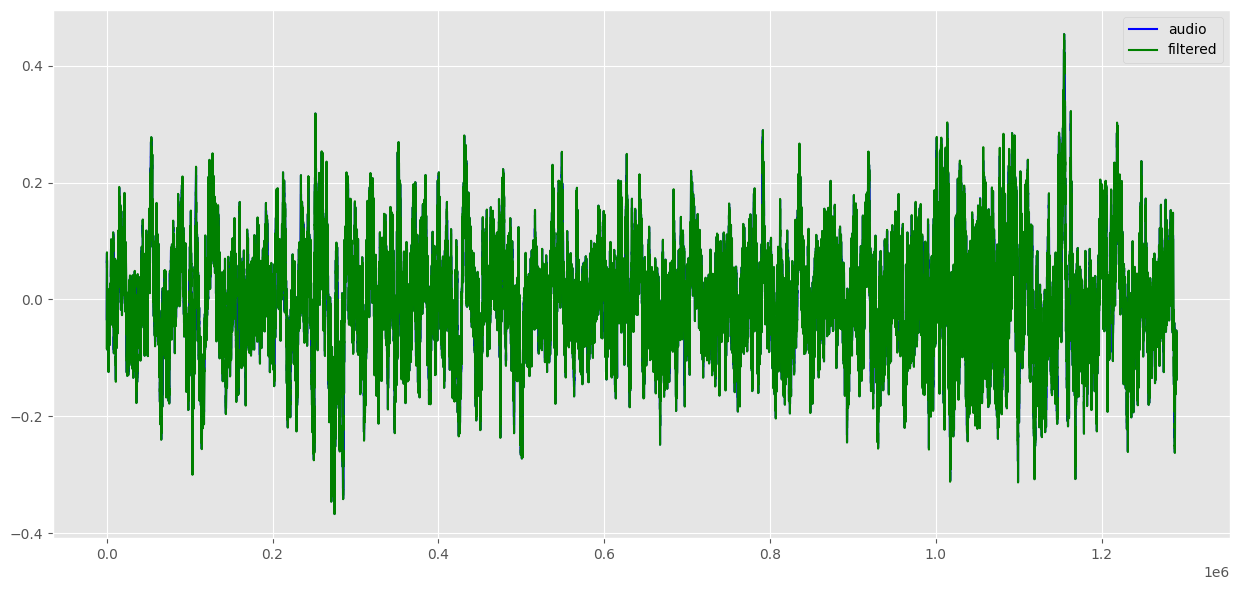

In [26]:
plt.figure(figsize=(12.5,6))
# plt.plot(u, "r:", linewidth=4, label="original")
plt.plot(d, "b", label="audio")
plt.plot(y, "g", label="filtered")
# plt.xlim(N-100,N)
plt.legend()
plt.tight_layout()
plt.show()

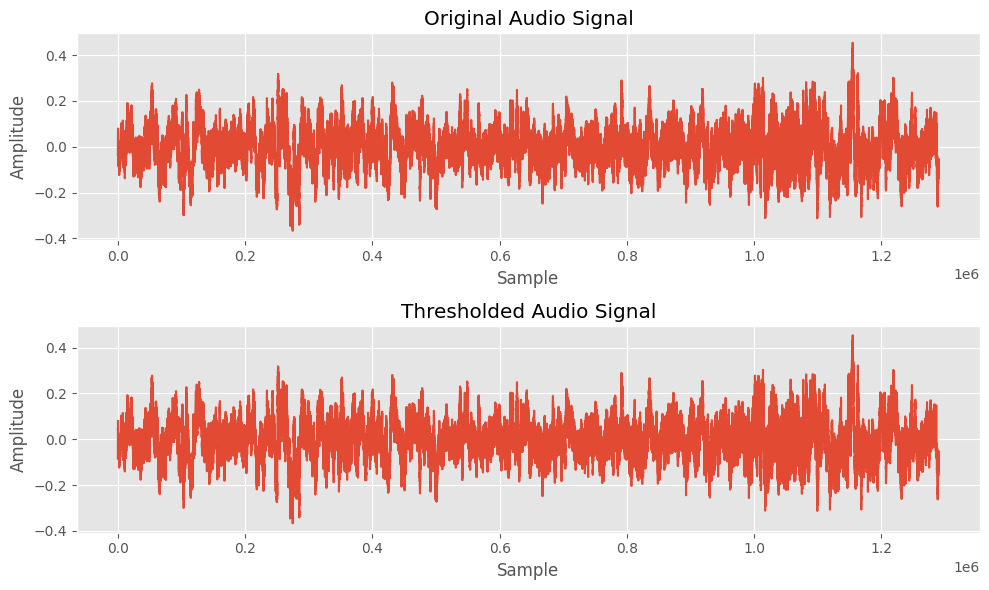

In [27]:

# Plot original and thresholded audio signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(d)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Thresholded Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [28]:
Audio(data=y,rate=sr)